# XPSO Patronum


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Matplotlib is building the font cache; this may take a moment.


In [2]:
Ec3A, E3A, S3A, Sc1_3A, Sc2_3A, Sc3_3A, Sc4_3A, Sc5_3A = np.loadtxt('data/raw_Ag_3d_30Ep_Al', unpack=True)

In [2]:
Mg_Sm_50mv_full,Mg_Sm_30mv_5p,Mg_Sm_30mv_4d,Mg_Sm_30mv_3d,Mg_Sm_20mv_3d,Mg_Ag_50mv_full,Mg_Ag_30mv_3p,Mg_Ag_30mv_3d,Al_Sm_50mv_full,Al_Sm_30mv_3d,Al_Ag_50mv_full,Al_Ag_30mv_3p,Al_Ag_30mv_3d=np.loadtxt('D:\LAB\Advanced Master Lab\XPS\Data\XPS_M15\XPS_M15', unpack=True)

PermissionError: [Errno 13] Permission denied: 'D:\\LAB\\Advanced Master Lab\\XPS\\Data\\XPS_M15\\XPS_M15'

In [ ]:
plt.plot(Mg_Sm_50mv_full)

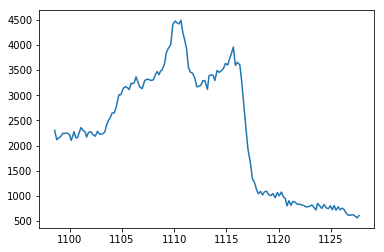

In [3]:
plt.plot(E3A, S3A)

In [4]:
def shirley (n, Emeas, integral):
    A1=0
    for i in range(len(Emeas)):
        if i < n:
            A1+=Emeas[i]
    return 1-A1/integral

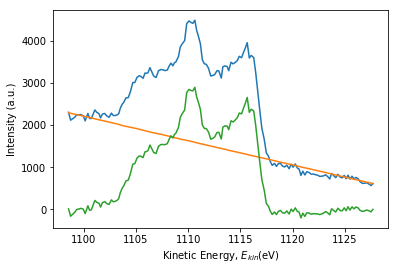

In [38]:
I3A = sum(E3A)
T3A = [shirley(i, E3A, I3A) for i in range(len(E3A))]
Shir3A = np.array(T3A)*(S3A[0]-S3A[-1]) + S3A[-1]
corr3A = S3A-Shir3A
plt.plot(E3A, S3A, E3A, Shir3A, E3A, corr3A)
plt.xlabel('Kinetic Energy, $E_{kin}$(eV)')
plt.ylabel('Intensity (a.u.)')
plt.savefig('plots/shirley.png')

In [6]:
E3A_ = E3A[45:112]
S3A_ = S3A[45:112]

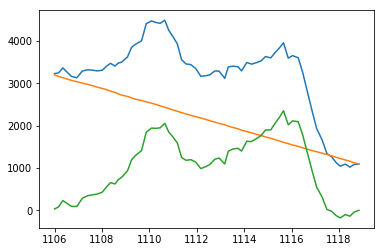

In [7]:
I3A_ = sum(E3A_)
T3A_ = [shirley(i, E3A_, I3A_) for i in range(len(E3A_))]
Shir3A_ = np.array(T3A_)*(S3A_[0]-S3A_[-1]) + S3A_[-1]
corr3A_ = S3A_-Shir3A_
plt.plot(E3A_, S3A_, E3A_, Shir3A_, E3A_, corr3A_)

In [13]:
E3M_ = E3M[45:112]
S3M_ = S3M[45:112]

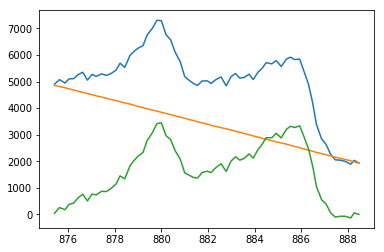

In [14]:
I3M_ = sum(E3M_)
T3M_ = [shirley(i, E3M_, I3M_) for i in range(len(E3M_))]
Shir3M_ = np.array(T3M_)*(S3M_[0]-S3M_[-1]) + S3M_[-1]
corr3M_ = S3M_-Shir3M_
plt.plot(E3M_, S3M_, E3M_, Shir3M_, E3M_, corr3M_)

In [128]:
np.savetxt('data/_corrected_Ag_3d_30Ep_Mg', np.c_[E3M_,corr3M_])

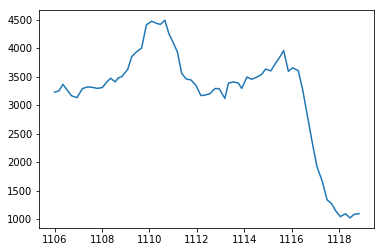

In [10]:
plt.plot(E3A[45:112],S3A[45:112])

In [11]:
np.savetxt('data/corrected_Ag_3d_30Ep_Al', np.c_[E3A,corr3A])

In [12]:
Ec3M, E3M, S3M, Sc1_3M, Sc2_3M, Sc3_3M, Sc4_3M, Sc5_3M = np.loadtxt('data/raw_Ag_3d_30Ep_Mg', unpack=True)

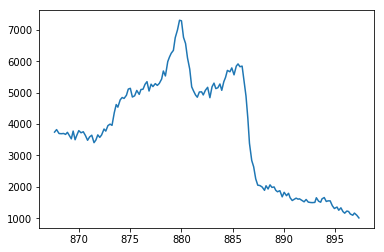

In [15]:
plt.plot(E3M, S3M)

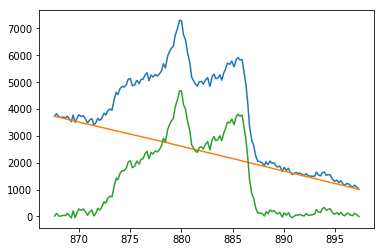

In [16]:
I3M = sum(E3M)
T3M = [shirley(i, E3M, I3M) for i in range(len(E3M))]
Shir3M = np.array(T3M)*(S3M[0]-S3M[-1]) + S3M[-1]
corr3M = S3M-Shir3M
plt.plot(E3M, S3M, E3M, Shir3M, E3M, corr3M)

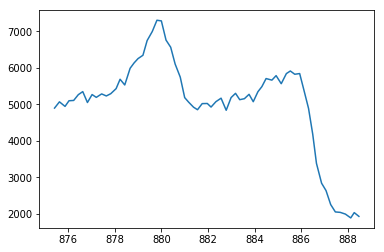

In [17]:
plt.plot(E3M[45:112],S3M[45:112])

In [103]:
np.savetxt('data/corrected_Ag_3d_30Ep_Mg', np.c_[E3M,corr3M])

## Plot both together now, in the hope of finding auger peaks

In [18]:
Ec5A, E5A, S5A, S5A = np.loadtxt('data/raw_Ag_survey_50Ep_Al', unpack=True)
Ec5M, E5M, S5M, S5M = np.loadtxt('data/raw_Ag_survey_50Ep_Mg', unpack=True)

#### try to find Auger emissions

In [19]:
Auger = [220.4, 265.4, 306.3, 339.3, 358.3, 685.7, 886.2]

In [20]:
Auger = [180.6, 237.4, 271.8, 306.2, 342.3, 362.64, 670]

In [21]:
Auger = [(220.4+237.4)/2, (265.4+271.8)/2, 306.2, (339.3+342.3)/2, (358.3+362.64)/2, (685.7+670)/2]

In [49]:
Auger

[228.9, 268.6, 306.2, 340.8, 360.47, 677.85]

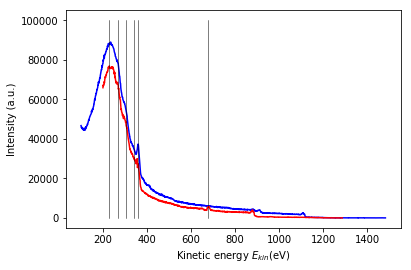

In [48]:
plt.plot(E5A, S5A, 'b', E5M, S5M, 'r')
plt.xlabel('Kinetic energy $E_{kin}$(eV)')
plt.ylabel('Intensity (a.u.)')
for point in Auger:
    plt.plot([point,point],[0,100000], '000000', linewidth=.5)
plt.savefig('plots/Ag_survey.png')

In [51]:
Der5A = S5A.copy()

In [60]:
for i in range(len(S5A)):
    Der5A[i-2]=S5A[i]-S5A[i-4]

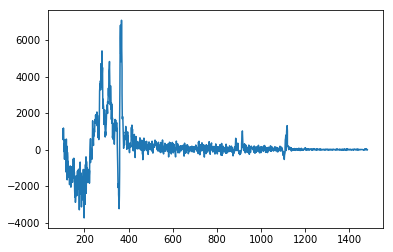

In [61]:
plt.plot(E5A[2:-2], Der5A[2:-2])

In [30]:
Mg_K=1253.6

In [34]:
MGB_E = Mg_K-E3M

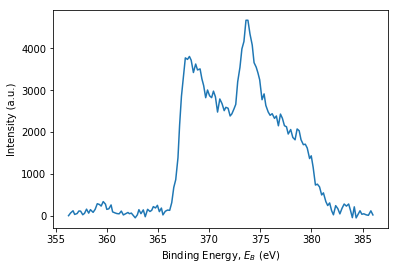

In [45]:
plt.plot(MGB_E, corr3M)
plt.xlabel('Binding Energy, $E_B$ (eV)')
plt.ylabel('Intensity (a.u.)')
plt.savefig('plots/Ag_3d_Mg')

In [42]:
Al_K = 1486.6

In [44]:
ALB_E = Al_K-E3A

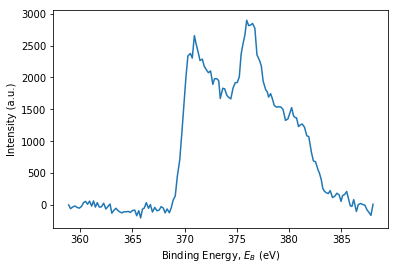

In [47]:
plt.plot(ALB_E, corr3A)
plt.xlabel('Binding Energy, $E_B$ (eV)')
plt.ylabel('Intensity (a.u.)')
plt.savefig('plots/Ag_3d_Al.png')